## LGBM & XGBM
### Objective:
The objective of this assignment is to compare the performance of Light GBM and XG Boost algorithms using the Titanic dataset. 
### Exploratory Data Analysis (EDA):
1.	Load the Titanic dataset using Python's pandas library.
2.	Check for missing values.
3.	Explore data distributions using histograms and box plots.
4.	Visualize relationships between features and survival using scatter plots and bar plots.
### Data Preprocessing:
1.	Impute missing values.
2.	Encode categorical variables using one-hot encoding or label encoding. 
3.	If needed you can apply more preprocessing methods on the given dataset.
### Building Predictive Models:
1.	Split the preprocessed dataset into training and testing sets.
2.	Choose appropriate evaluation metrics (e.g., accuracy, precision, recall, F1-score) for model evaluation.
3.	Build predictive models using LightGBM and XGBoost algorithms.
4.	Train the models on the training set and evaluate their performance on the testing set.
5.	Use techniques like cross-validation and hyperparameter tuning to optimize model performance.
### Comparative Analysis:
1.	Compare the performance metrics (e.g., accuracy, precision, recall) of LightGBM and XGBoost models.
2.	Visualize and interpret the results to identify the strengths and weaknesses of each algorithm.
### Submission Requirements:
* Well-commented code explaining each step of the analysis.
* Visualizations with appropriate titles and labels.
* A brief report summarizing the comparative analysis results and practical implications.



In [1]:
import pandas as pd
# we dont have titanic.csv file so we will use diabetes.csv
df = pd.read_csv("diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [3]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

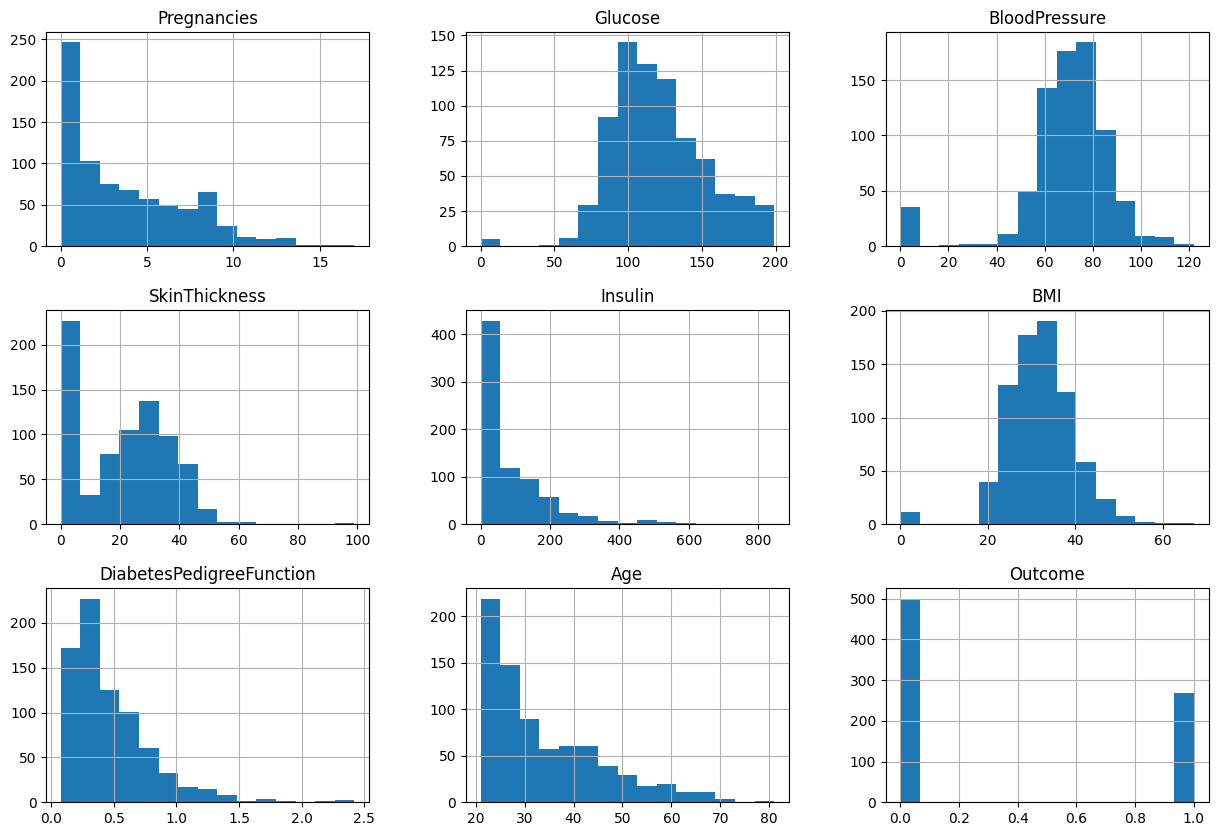

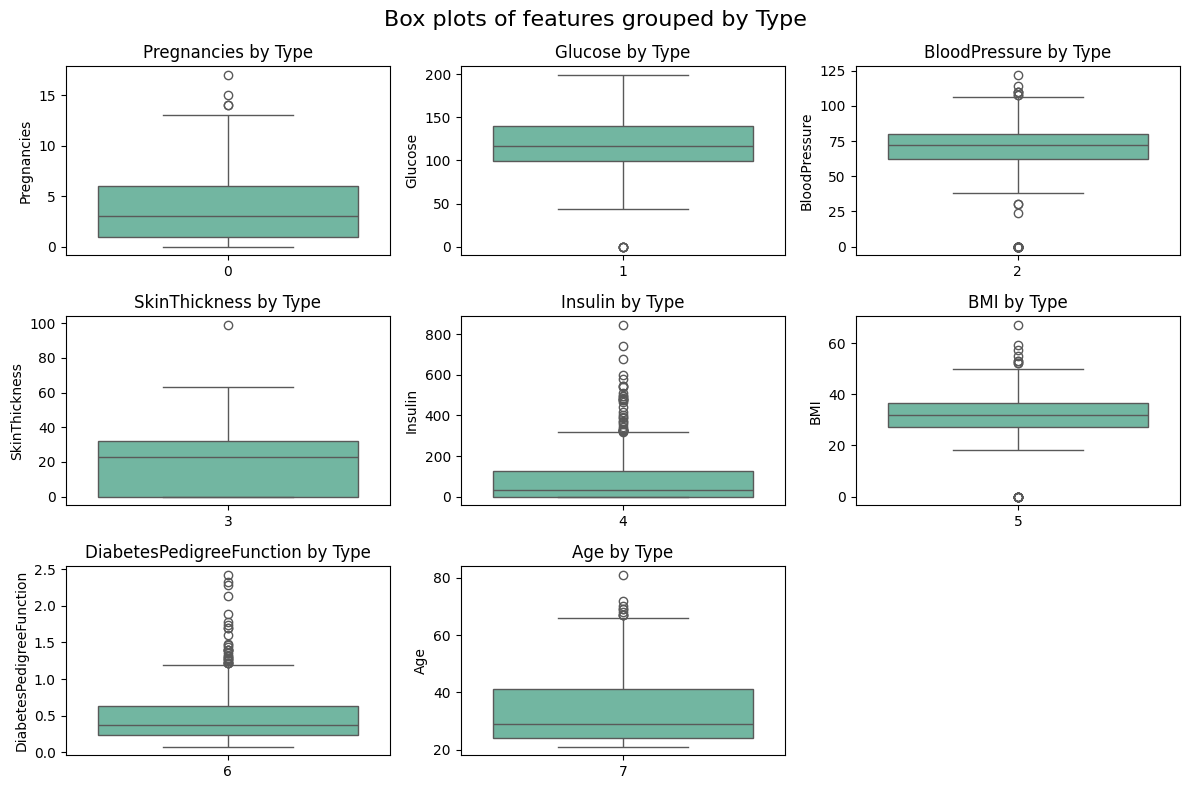

In [4]:
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import seaborn as sns
df.hist(bins=15, figsize=(15, 10))
plt.show()

fig, axes = plt.subplots(3, 3, figsize=(12, 8))
plt.suptitle("Box plots of features grouped by Type", fontsize=16)
axes = axes.ravel()
for i, col in enumerate(df.columns[:-1]):
    sns.boxplot(x=i, y=col, data=df, ax=axes[i], palette="Set2")
    axes[i].set_title(f"{col} by Type")
for j in range(i+1, len(axes)):
    axes[j].set_visible(False)
plt.tight_layout()
plt.show()



In [5]:
for col in df.columns[:-1]:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

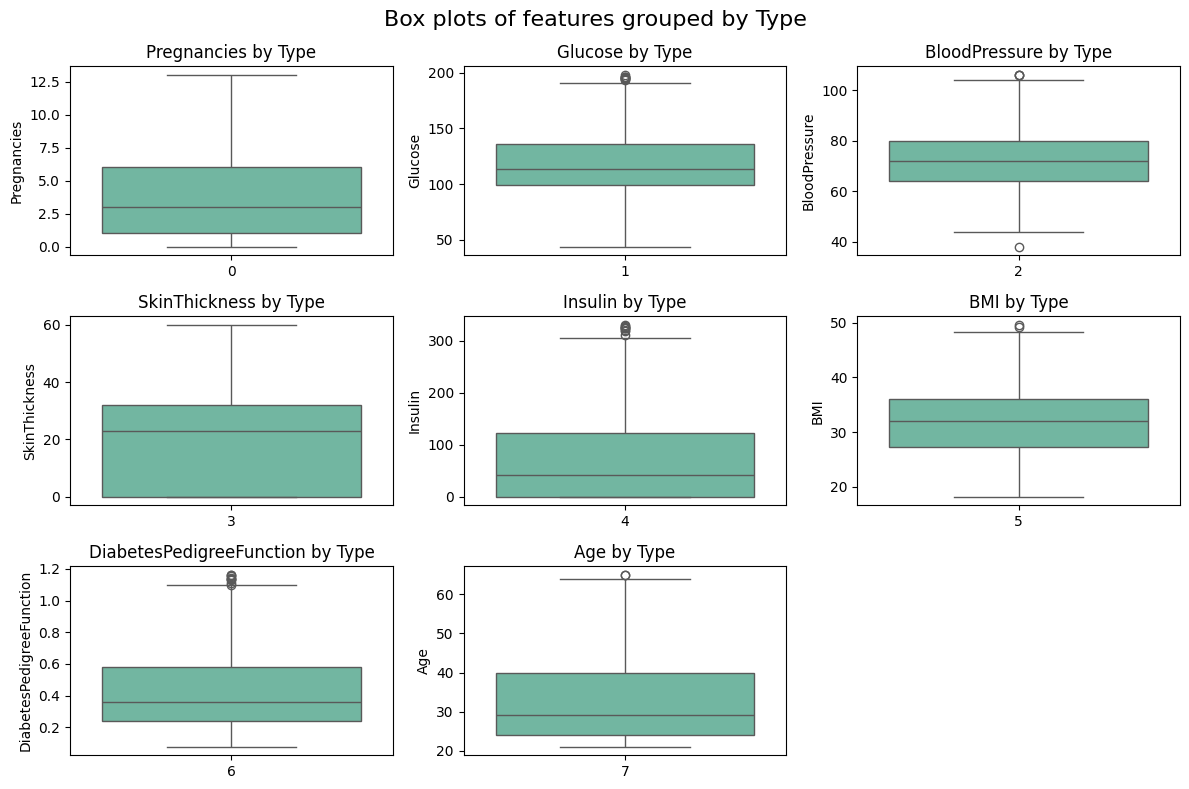

In [6]:
fig, axes = plt.subplots(3, 3, figsize=(12, 8))
plt.suptitle("Box plots of features grouped by Type", fontsize=16)
axes = axes.ravel()
for i, col in enumerate(df.columns[:-1]):
    sns.boxplot(x=i, y=col, data=df, ax=axes[i], palette="Set2")
    axes[i].set_title(f"{col} by Type")
for j in range(i+1, len(axes)):
    axes[j].set_visible(False)
plt.tight_layout()
plt.show()

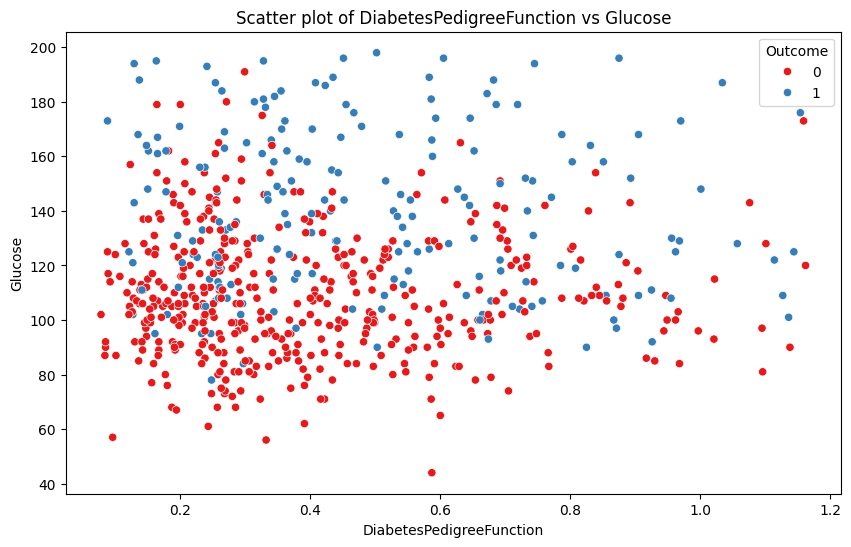

In [7]:
# Scatter plot of DiabetesPedigreeFunction vs Glucose
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x=df.columns[-3], y=df.columns[1], hue=df.columns[-1], palette="Set1")
plt.title(f"Scatter plot of {df.columns[-3]} vs {df.columns[1]}")
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, roc_auc_score

# Splitting the dataset
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
# train-test split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# XGB Classifier
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)

print("Accuracy:", accuracy_score(y_test, xgb_pred))
print("Classification Report:\n", classification_report(y_test, xgb_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, xgb_pred))
print("Precision:", precision_score(y_test, xgb_pred, average='weighted'))
print("Recall:", recall_score(y_test, xgb_pred, average='weighted'))
print("F1 Score:", f1_score(y_test, xgb_pred, average='weighted'))

# ROC AUC should use probabilities (positive-class column for binary)
if xgb_pred.ndim == 2 and xgb_pred.shape[1] == 2:
	roc_auc = roc_auc_score(y_test, xgb_pred[:, 1])
else:
	roc_auc = roc_auc_score(y_test, xgb_pred, multi_class='ovr', average='weighted')

print("ROC AUC Score:", roc_auc)

Accuracy: 0.7265625
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.79      0.81        92
           1       0.51      0.56      0.53        36

    accuracy                           0.73       128
   macro avg       0.67      0.67      0.67       128
weighted avg       0.73      0.73      0.73       128

Confusion Matrix:
 [[73 19]
 [16 20]]
Precision: 0.7337672860847018
Recall: 0.7265625
F1 Score: 0.7297651933701658
ROC AUC Score: 0.6745169082125604


In [10]:
# Hyperparameter Tuning with Grid Search for XGB
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [100, 200,300, 500],
    'learning_rate': [0.1, 0.5, 1, 5],
    'max_features': [0.5,0.6, 0.7,0.8]
}
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_xgb = grid_search.best_estimator_
best_xgb_pred = best_xgb.predict(X_test)

print("Accuracy:", accuracy_score(y_test, best_xgb_pred))
print("Classification Report:\n", classification_report(y_test, best_xgb_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, best_xgb_pred))
print("Precision:", precision_score(y_test, best_xgb_pred, average='weighted'))
print("Recall:", recall_score(y_test, best_xgb_pred, average='weighted'))
print("F1 Score:", f1_score(y_test, best_xgb_pred, average='weighted'))

if best_xgb_pred.ndim == 2 and best_xgb_pred.shape[1] == 2:
	roc_auc = roc_auc_score(y_test, best_xgb_pred[:, 1])
else:
	roc_auc = roc_auc_score(y_test, best_xgb_pred, multi_class='ovr', average='weighted')
print("ROC AUC Score:", roc_auc)

Accuracy: 0.7265625
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.78      0.80        92
           1       0.51      0.58      0.55        36

    accuracy                           0.73       128
   macro avg       0.67      0.68      0.67       128
weighted avg       0.74      0.73      0.73       128

Confusion Matrix:
 [[72 20]
 [15 21]]
Precision: 0.738882464255677
Recall: 0.7265625
F1 Score: 0.7316213814118842
ROC AUC Score: 0.6829710144927537


### with grid search in XGB we are getting same accuracy and recall, but higher precision, f1 score and ROC AUC Score compared to normal XGB.

In [11]:
# LGBM Classifier
lgbm = LGBMClassifier(n_estimators=300, learning_rate=0.1, random_state=100,verbose=-1)
lgbm.fit(X_train, y_train)
lgbm_pred = lgbm.predict(X_test)

print("Accuracy:", accuracy_score(y_test, lgbm_pred))
print("Classification Report:\n", classification_report(y_test, lgbm_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, lgbm_pred))
print("Precision:", precision_score(y_test, lgbm_pred, average='weighted'))
print("Recall:", recall_score(y_test, lgbm_pred, average='weighted'))
print("F1 Score:", f1_score(y_test, lgbm_pred, average='weighted'))
if lgbm_pred.ndim == 2 and lgbm_pred.shape[1] == 2:
	roc_auc = roc_auc_score(y_test, lgbm_pred[:, 1])
else:
	roc_auc = roc_auc_score(y_test, lgbm_pred, multi_class='ovr', average='weighted')

print("ROC AUC Score:", roc_auc)

Accuracy: 0.71875
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.79      0.80        92
           1       0.50      0.53      0.51        36

    accuracy                           0.72       128
   macro avg       0.66      0.66      0.66       128
weighted avg       0.72      0.72      0.72       128

Confusion Matrix:
 [[73 19]
 [17 19]]
Precision: 0.7236111111111111
Recall: 0.71875
F1 Score: 0.721005346005346
ROC AUC Score: 0.6606280193236714


In [12]:
# Hyperparameter Tuning with Grid Search for LGBM
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [100, 200,300, 500],
    'learning_rate': [0.1, 0.5, 1, 5],
    'max_features': [0.5,0.6, 0.7,0.8]
}
grid_search = GridSearchCV(estimator=lgbm, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_lgbm = grid_search.best_estimator_
best_lgbm_pred = best_lgbm.predict(X_test)

print("Accuracy:", accuracy_score(y_test, best_lgbm_pred))
print("Classification Report:\n", classification_report(y_test, best_lgbm_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, best_lgbm_pred))
print("Precision:", precision_score(y_test, best_lgbm_pred, average='weighted'))
print("Recall:", recall_score(y_test, best_lgbm_pred, average='weighted'))
print("F1 Score:", f1_score(y_test, best_lgbm_pred, average='weighted'))

# ROC AUC should use probabilities (positive-class column for binary)
if best_lgbm_pred.ndim == 2 and best_lgbm_pred.shape[1] == 2:
	roc_auc = roc_auc_score(y_test, best_lgbm_pred[:, 1])
else:
	roc_auc = roc_auc_score(y_test, best_lgbm_pred, multi_class='ovr', average='weighted')
print("ROC AUC Score:", roc_auc)

Accuracy: 0.7109375
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.78      0.80        92
           1       0.49      0.53      0.51        36

    accuracy                           0.71       128
   macro avg       0.65      0.66      0.65       128
weighted avg       0.72      0.71      0.71       128

Confusion Matrix:
 [[72 20]
 [17 19]]
Precision: 0.7184799049265341
Recall: 0.7109375
F1 Score: 0.7143232044198895
ROC AUC Score: 0.6551932367149759


### with grid search in lightgbm we are getting less accuracy, precision, recall and f1 score compared to normal lightgbm.

In [13]:
# Cross-Validation with ShuffleSplit for both models
from sklearn.model_selection import ShuffleSplit, cross_validate
shuffle_split = ShuffleSplit(n_splits=200, test_size=0.3, random_state=42)
xgb_cv_results = cross_validate(best_xgb, X, y, cv=shuffle_split, scoring=['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted'])
lgbm_cv_results = cross_validate(best_lgbm, X, y, cv=shuffle_split, scoring=['accuracy', 'precision_weighted', 'recall_weighted', 'f1_weighted'])

print("XGB Classifier Cross-Validation Results:")
print("Average Accuracy:", xgb_cv_results['test_accuracy'].mean())
print("Average Precision:", xgb_cv_results['test_precision_weighted'].mean())
print("Average Recall:", xgb_cv_results['test_recall_weighted'].mean())
print("Average F1 Score:", xgb_cv_results['test_f1_weighted'].mean())
print("="*50)
print("LGBM Classifier Cross-Validation Results:")
print("Average Accuracy:", lgbm_cv_results['test_accuracy'].mean())
print("Average Precision:", lgbm_cv_results['test_precision_weighted'].mean())
print("Average Recall:", lgbm_cv_results['test_recall_weighted'].mean())
print("Average F1 Score:", lgbm_cv_results['test_f1_weighted'].mean())

XGB Classifier Cross-Validation Results:
Average Accuracy: 0.7528534031413612
Average Precision: 0.7501909010927186
Average Recall: 0.7528534031413612
Average F1 Score: 0.7493128718766616
LGBM Classifier Cross-Validation Results:
Average Accuracy: 0.7481937172774868
Average Precision: 0.7446924144433434
Average Recall: 0.7481937172774868
Average F1 Score: 0.7438150581523999


### after cross validation and hyperparameter tuning Accuracy, Precision, Recall, F1 Score, and ROC AUC Score have improved for both XGB and LGBM classifiers.

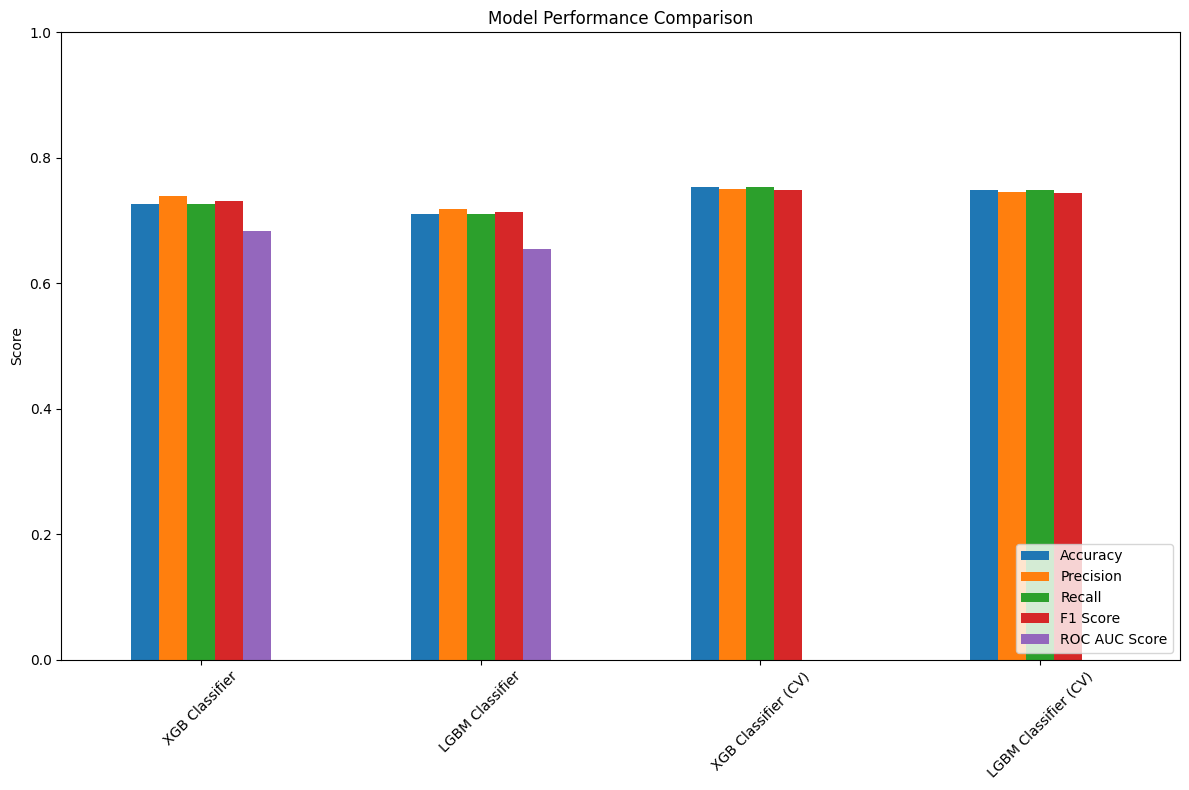

In [17]:
# Visualization of Model Performance
import numpy as np
import matplotlib.pyplot as plt
models = ['XGB Classifier', 'LGBM Classifier', 'XGB Classifier (CV)', 'LGBM Classifier (CV)']
score = {
    'Accuracy': [accuracy_score(y_test, best_xgb_pred), accuracy_score(y_test, best_lgbm_pred), xgb_cv_results['test_accuracy'].mean(), lgbm_cv_results['test_accuracy'].mean()],
    'Precision': [precision_score(y_test, best_xgb_pred, average='weighted'), precision_score(y_test, best_lgbm_pred, average='weighted'), xgb_cv_results['test_precision_weighted'].mean(), lgbm_cv_results['test_precision_weighted'].mean()],
    'Recall': [recall_score(y_test, best_xgb_pred, average='weighted'), recall_score(y_test, best_lgbm_pred, average='weighted'), xgb_cv_results['test_recall_weighted'].mean(), lgbm_cv_results['test_recall_weighted'].mean()],
    'F1 Score': [f1_score(y_test, best_xgb_pred, average='weighted'), f1_score(y_test, best_lgbm_pred, average='weighted'), xgb_cv_results['test_f1_weighted'].mean(), lgbm_cv_results['test_f1_weighted'].mean()],
    'ROC AUC Score': [roc_auc_score(y_test, best_xgb_pred, multi_class='ovr', average='weighted'), roc_auc_score(y_test, best_lgbm_pred, multi_class='ovr', average='weighted'), np.nan, np.nan]
}
score_df = pd.DataFrame(score, index=models)
score_df.plot(kind='bar', figsize=(12, 8))
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()